# 선형회귀 직접 구현

## 데이터셋 준비

 - 사이킷런 임의 회귀 데이터 생성

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
# 가상의 데이터 생성
data = make_regression(n_samples = 1000, n_features = 1, bias = 1000, noise = 50) 
# 1000개의 데이터, 1개의 특성 가진 데이터 셋을 생성합니다.

#X_1 -> data[0] / y_1 -> data[1]

In [3]:
x_train = data[0]
y_train = data[1]

n_data = len(x_train)
print(n_data, x_train.shape, y_train.shape)

1000 (1000, 1) (1000,)


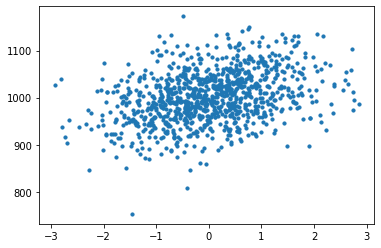

In [10]:
plt.scatter(x_train, y_train, s=10)
plt.show()

## Hypothesis, Cost 정의

 - hypothesis: x_train * w1 + w0
 - cost : RSS

## Weight 초기화

In [25]:
w1 = np.random.rand(1)
w0 = np.random.rand(1)
print(w1, w0)

[0.37505782] [0.37975901]


In [50]:
w1 = np.array([0.37505782])
w0 = np.array([0.37975901])

In [47]:
print(w1, w0)

[0.37505782] [0.37975901]


## y_pred 계산

In [51]:
y_pred = x_train * w1 + w0
y_pred[:5]

array([[ 3.62125262e-01],
       [ 1.62426880e-04],
       [ 2.23063814e-01],
       [ 7.10834855e-02],
       [-2.12296425e-01]])

In [11]:
len(y_pred), len(y_train)

(1000, 1000)

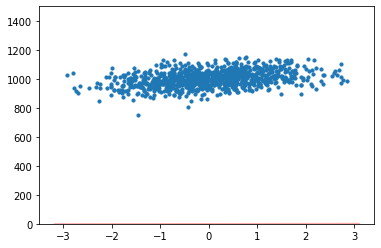

In [52]:
xs = [x_train.min()-0.25, x_train.max()+0.25]
ys = xs * w1 + w0
plt.scatter(x_train, y_train, s=10)
plt.ylim(0, 1500)
plt.plot(xs, ys, color="#faa")
plt.show()

## cost 계산

 - cost = np.sum((y_train - y_pred) ** 2) / n_data

In [53]:
cost = np.sum((y_train-y_pred)**2)/n_data

## Weight 업데이트

 - w1 -= (-1) * np.sum((y_train - y_pred)  * x_train) * 2 / n_data
 - w0 -= (-1) * np.sum(y_train - y_pred) * 2 / n_data

In [54]:
w1 -= (-1/4000)*np.sum((y_train-y_pred)*x_train)*2/n_data
w0 -= (-1/4000)*np.sum(y_train-y_pred)*2/n_data
print(w1, w0)

[2.33408801] [500.68521266]


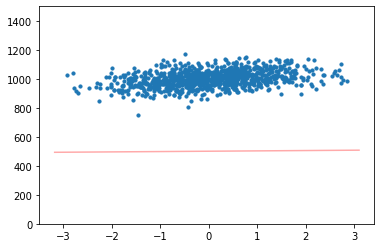

In [56]:
xs = [x_train.min()-0.25, x_train.max()+0.25]
ys = xs * w1 + w0
plt.scatter(x_train, y_train, s=10)
plt.ylim(0, 1500)
plt.plot(xs, ys, color="#faa")
plt.show()

## 반복

 - epochs : 반복횟수
 - learning rate : 학습률

 - 출력 지우기
    - from IPython.display import clear_output 
    - clear_output()

In [6]:
pip install scikit-learn

     ---------------------------------------- 8.3/8.3 MB 11.0 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 9.3 MB/s eta 0:00:00
     ---------------------------------------- 42.5/42.5 MB 9.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [8]:
epochs = 1000
learning_rate = 0.01

In [9]:
def show_graph(w1, w0):
    xs = [x_train.min()-0.25, x_train.max()+0.25]
    ys = xs * w1 + w0
    plt.scatter(x_train, y_train, s=10)
    # plt.ylim(0, 1500)
    plt.plot(xs, ys, color="#faa")
    # clear_output()
    plt.show()
    return

In [13]:
def linear_self(x_train, y_train, epochs, learning_rate):
    w1 = np.random.rand(1)
    w0 = np.random.rand(1)
    temp = 2**64 -1
    for i in range(epochs):
        if (i+1)%500 == 0:
            print(str(i+1)+f'번째 실행중, w1:{w1} w0:{w0} cost:{cost}')
            # show_graph(w1, w0)
        # time.sleep(0.5)
        y_pred = x_train * w1 + w0
        cost = np.sum((y_train-y_pred.reshape(-1))**2)/n_data
        cost_list.append(cost)
        if cost >= temp:
            break
        w1 -= (-learning_rate)*np.dot((y_train-y_pred.reshape(-1)), x_train)*2/n_data
        w0 -= (-learning_rate)*np.sum(y_train-y_pred.reshape(-1))*2/n_data
        temp = cost
    print(f'w1:{w1}, w0:{w0}, cost:{temp}')
    return

1000 (1000, 1) (1000,)


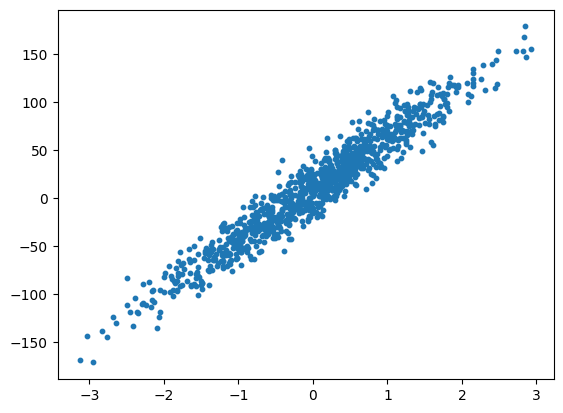

In [11]:
data = make_regression(n_samples = 1000, n_features = 1, bias = 10, noise = 15)
x_train = data[0]
y_train = data[1]
n_data = len(x_train)
print(n_data, x_train.shape, y_train.shape)
plt.scatter(x_train, y_train, s=10)
plt.show()

500번째 실행중, w1:[34.32056614] w0:[6.72247823] cost:578.824153217659
1000번째 실행중, w1:[46.22392842] w0:[8.81333673] cost:259.6909277928269
1500번째 실행중, w1:[50.42471562] w0:[9.51753008] cost:220.05174825197383
2000번째 실행중, w1:[51.9073874] w0:[9.75366372] cost:215.1269673817725
2500번째 실행중, w1:[52.43076484] w0:[9.83244524] cost:214.51494227145778
3000번째 실행중, w1:[52.61553978] w0:[9.85857409] cost:214.43886007772574
3500번째 실행중, w1:[52.68078244] w0:[9.86717959] cost:214.42939899935556
4000번째 실행중, w1:[52.70382249] w0:[9.86999009] cost:214.4282220561301
4500번째 실행중, w1:[52.71196019] w0:[9.87089863] cost:214.42807558831316
5000번째 실행중, w1:[52.71483485] w0:[9.8711886] cost:214.42805735286308
w1:[52.71483812], w0:[9.87118891], cost:214.42805734207744


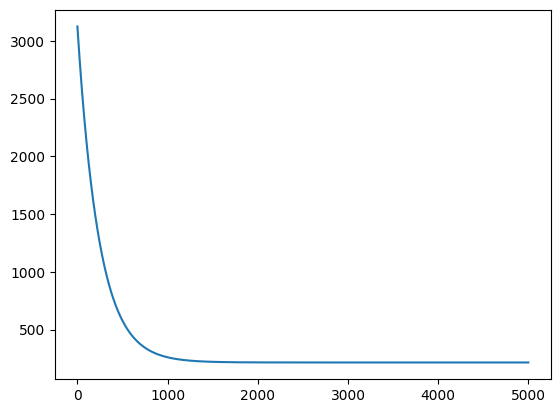

In [14]:
cost_list = []
linear_self(x_train, y_train, 5000, 0.001)
plt.plot(np.arange(5000), cost_list)
plt.show()

In [15]:
data = make_regression(n_samples = 1000, n_features = 100, bias = 1000, noise = 50)
x_train = data[0]
y_train = data[1]
n_data = len(x_train)
print(n_data, x_train.shape, y_train.shape)

1000 (1000, 100) (1000,)


In [17]:
def linear_self_n(x_train, y_train, epochs, learning_rate):
    n_data = len(x_train)
    w = np.random.rand(x_train.shape[1])
    b = np.random.rand(1)
    cost_list = []
    for i in range(epochs):
        y_pred = np.dot(x_train, w) + b
        cost = np.sum((y_train - y_pred.reshape(-1))**2) / n_data
        cost_list.append(cost)
        if i % 500 == 0:
            print(i+1, '번째 실행, cost : ', cost)
        # w = w - (-learning_rate)*(y_train.reshape(-1,1)-y_pred).reshape(1,n_data).dot(x_train).T
        w -= (-learning_rate)*np.dot((y_train-y_pred.reshape(-1)), x_train)*2/n_data
        b -= (-learning_rate)*np.sum(y_train-y_pred.reshape(-1))*2/n_data
    print(i+1, '번째 실행, cost : ', cost)
    plt.plot(np.arange(epochs), cost_list)
    plt.show()
    return

1 번째 실행, cost :  1026278.5473274767
501 번째 실행, cost :  139948.5608600945
1001 번째 실행, cost :  27842.469686268374
1501 번째 실행, cost :  8154.6284363655395
2001 번째 실행, cost :  3815.1026586501966
2501 번째 실행, cost :  2717.422765652619
3001 번째 실행, cost :  2415.21555673324
3501 번째 실행, cost :  2327.1274977912544
4001 번째 실행, cost :  2300.349640648453
4501 번째 실행, cost :  2291.9387407658446
5000 번째 실행, cost :  2289.2298929905346


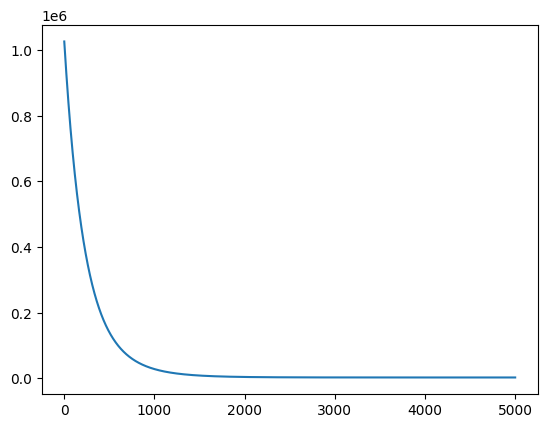

In [18]:
linear_self_n(x_train, y_train, 5000, 0.001)